In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
spam=pd.read_csv('combined_data.csv')

In [2]:
spam.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [3]:
spam.isnull().sum()

label    0
text     0
dtype: int64

In [4]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


EDA

In [5]:
spam['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x177bf046fd0>,
 [Text(-0.09042452969926633, 1.0962770655398508, 'ham'),
  Text(0.09042452969926644, -1.0962770655398508, 'spam')])

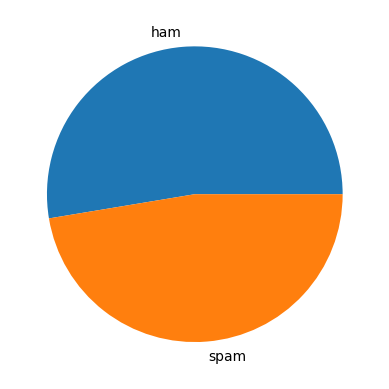

In [6]:
plt.pie(spam['label'].value_counts(),labels=['ham','spam'])

In [7]:
import nltk

In [8]:
spam['len_text']=spam['text'].apply(len)

In [9]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     83448 non-null  int64 
 1   text      83448 non-null  object
 2   len_text  83448 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [10]:
spam['no_words']=spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [11]:
spam['no_sentence']=spam['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [12]:
spam=spam.drop('no_sentence',axis=1)

In [13]:
spam[spam['label']==0][['len_text','no_words']].describe()

,len_text,no_words
count,39538.000000,39538.000000
mean,2121.693814,367.659467
std,5666.075286,986.766959
min,1.000000,1.000000
25%,579.000000,107.000000
50%,1139.000000,202.000000
75%,2174.000000,381.000000
max,598705.000000,101984.000000


In [14]:
spam[spam['label']==1][['len_text','no_words']].describe()

,len_text,no_words
count,43910.000000,43910.000000
mean,1249.887247,210.613915
std,1978.631507,340.723605
min,1.000000,1.000000
25%,360.000000,62.000000
50%,704.000000,122.000000
75%,1510.000000,250.000000
max,144087.000000,25444.000000


Data proccessing

In [15]:
from nltk.corpus import stopwords
stop_word=stopwords.words('english')
import string


In [16]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [17]:
def tranform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    for i in text:
        if not i.isalnum:
            text.remove(i)
        elif i in stop_word:
            text.remove(i)
    for i in text:
        if i in string.punctuation:
            text.remove(i)
    for i in range(len(text)):
        text[i]=ps.stem(text[i])
    return ' '.join(text)        

In [18]:
tranform_text('My Nameing is ! sahil 20%')

'name sahil 20'

In [19]:
spam['prcosseing']=spam['text'].apply(tranform_text)

In [20]:
spam.head()

,label,text,len_text,no_words,prcosseing
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get your medircations online qnb ikud v...,808,104,wulvob get medirc onlin qnb ikud viagra escape...
2,0,computer connection from cnn com wednesday es...,2235,338,comput connect cnn com wednesday escapenumb ma...
3,1,university degree obtain a prosperous future m...,592,76,univers degre obtain prosper futur money earn ...
4,0,thanks for all your answers guys i know i shou...,1362,223,thank all answer guy know should check rsync m...


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=3000)

In [22]:
X = tfidf_vectorizer.fit_transform(spam['prcosseing'])
Y=spam['label']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [24]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [27]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

In [28]:
accuracy

0.984361893349311

In [42]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
def preproccesing(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalnum()]
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_word]
    return ' '.join(words)

# Usage:
prediction = classifier.predict(tfidf_vectorizer.transform([preproccesing('hi my name is sahil and irs is reaching you')]))


In [43]:
prediction

array([1], dtype=int64)